In [14]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import json
import re

plt.rcParams.update({'font.size': 8})

In [15]:
data = pd.read_csv("/Users/Stoneberry/Desktop/papers/master/data from names/database2.csv", sep=";")

In [16]:
data.head()

,Unnamed: 0,Название,Местоположение,На карте,Номер,Адрес электронной почты,Адрес сайта,Описание,Принадлежность,Подчинение,Тэги,Изображение,Регион,Район
0,0,Аксёновская сельская библиотека-филиал № 4,Галичский район,"{""coordinates"":[42.50301500000001,58.309780999...","[{""comment"":"""",""value"":""74943721442""}]",biblioteka-gorkogo.galich@yandex.ru,NaN,"<p style=""text-align:left""><span>Библиотека ос...",mincult,Галичский район,NaN,"{""title"":""1.jpg"",""url"":""https://all.culture.ru...",Костромская,Костромская
1,1,Мелёшинская сельская библиотека-филиал № 15,Галичский район,"{""coordinates"":[42.54122,58.438008],""type"":""Po...","[{""comment"":"""",""value"":""74943721442""}]",biblioteka-gorkogo.galich@yandex.ru,NaN,"<p style=""text-align:left""><span> Библиотека о...",mincult,Галичский район,NaN,"{""title"":""1.jpg"",""url"":""https://all.culture.ru...",Костромская,Костромская
2,2,Ряжская центральная библиотека,Ряжский район,"{""coordinates"":[40.06328100000002,53.708139000...","[{""comment"":"""",""value"":""74913222841""}]",ryagsk-biblioteka2010@yandex.ru,http://www.ryajsk-lib.ru,"<p style=""text-align:left""><span>В феврале 186...",mincult,Ряжский район,NaN,"{""title"":""IMG_0449.JPG"",""url"":""https://all.cul...",Рязанская,Рязанская
3,3,Левковская сельская библиотека-филиал № 12,Галичский район,"{""coordinates"":[42.187105,58.552082999999996],...","[{""comment"":"""",""value"":""74943721442""}]",biblioteka-gorkogo.galich@yandex.ru,NaN,"<p style=""text-align:left""><span>Левковская се...",mincult,Галичский район,NaN,"{""title"":""2.jpg"",""url"":""https://all.culture.ru...",Костромская,Костромская
4,4,Сасовская центральная библиотека,Сасово,"{""coordinates"":[41.91434900000001,54.341094999...","[{""comment"":"""",""value"":""74913351408""}]",foliant@pochtamt.ru,NaN,"<p style=""text-align:left""><span><span>Сасовск...",mincult,Сасово,"[{""sysName"":""dlya-detey"",""name"":""Для детей"",""i...","{""title"":""Фото ЦБ.jpg"",""url"":""https://all.cult...",Рязанская,Рязанская


## Типы библиотек из названий

In [17]:
type_index_path = '/Users/Stoneberry/Desktop/papers/master/data from names/types_libr.csv'
type_index = pd.read_csv(type_index_path, sep=';')
type_index['len'] = type_index.inds.apply(len)
type_index = type_index.sort_values('len', ascending=False)

In [18]:
type_index.head()

,name,type,inds,len
8,сельский,area,"0,1,3,5,7,12,13,14,15,16,17,18,19,20,23,28,30,...",14125
1,детский,age,"814,1004,1037,3103,3104,3243,3713,4457,4646,60...",5464
4,городской,area,"10,25,38,69,84,87,103,106,107,109,110,134,136,...",3481
11,районный,area,"144,146,157,169,182,188,203,207,223,247,277,28...",2066
79,модельный,model,"117,131,156,219,411,461,472,476,535,577,582,58...",1868


In [19]:
plot_path = "/Users/Stoneberry/Desktop/papers/master/stat/"

def myplot(x, y, title, xname, yname, name=False, rotation=45,
           type_='bar', label=None, text = False):
   
    global plot_path
        
    fig = plt.figure(figsize = (18, 8))
    ax = fig.gca()
    
    if type_ == 'scatter':
        plt.scatter(x, y, color = 'rosybrown', label=label)
    
    else:
        plt.bar(x, y, color = 'rosybrown')
        plt.xticks(rotation = rotation) #rotation='vertical')
        
    if text:
        for index, item in enumerate(zip(x, y)):
            plt.annotate(text[index], # this is the text
                         item, # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center')
    
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gainsboro', linestyle='dashed')
    ax.xaxis.grid(color='gainsboro', linestyle='dashed')
    
    if name:
        plt.savefig(plot_path + name + ".svg", format='svg', dpi=1200)

## Размеры типов

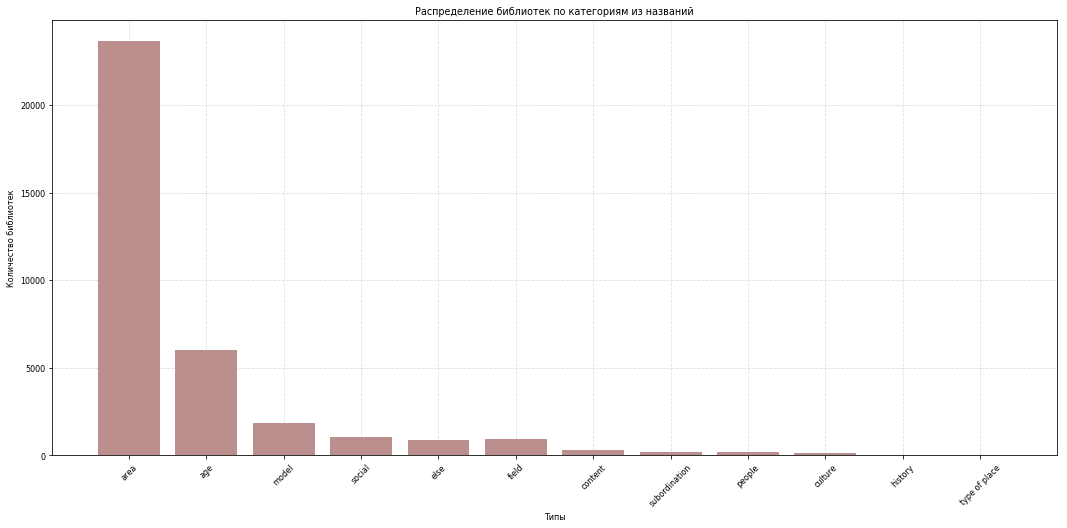

In [20]:
res = defaultdict(int)

for index in type_index.index:
    l = len(type_index.inds[index])
    res[type_index.type[index]] += l

myplot(res.keys(), res.values(),
       'Распределение библиотек по категориям из названий', 
       'Типы', 'Количество библиотек',
       name='libr_types2')

## Распределения по категориям

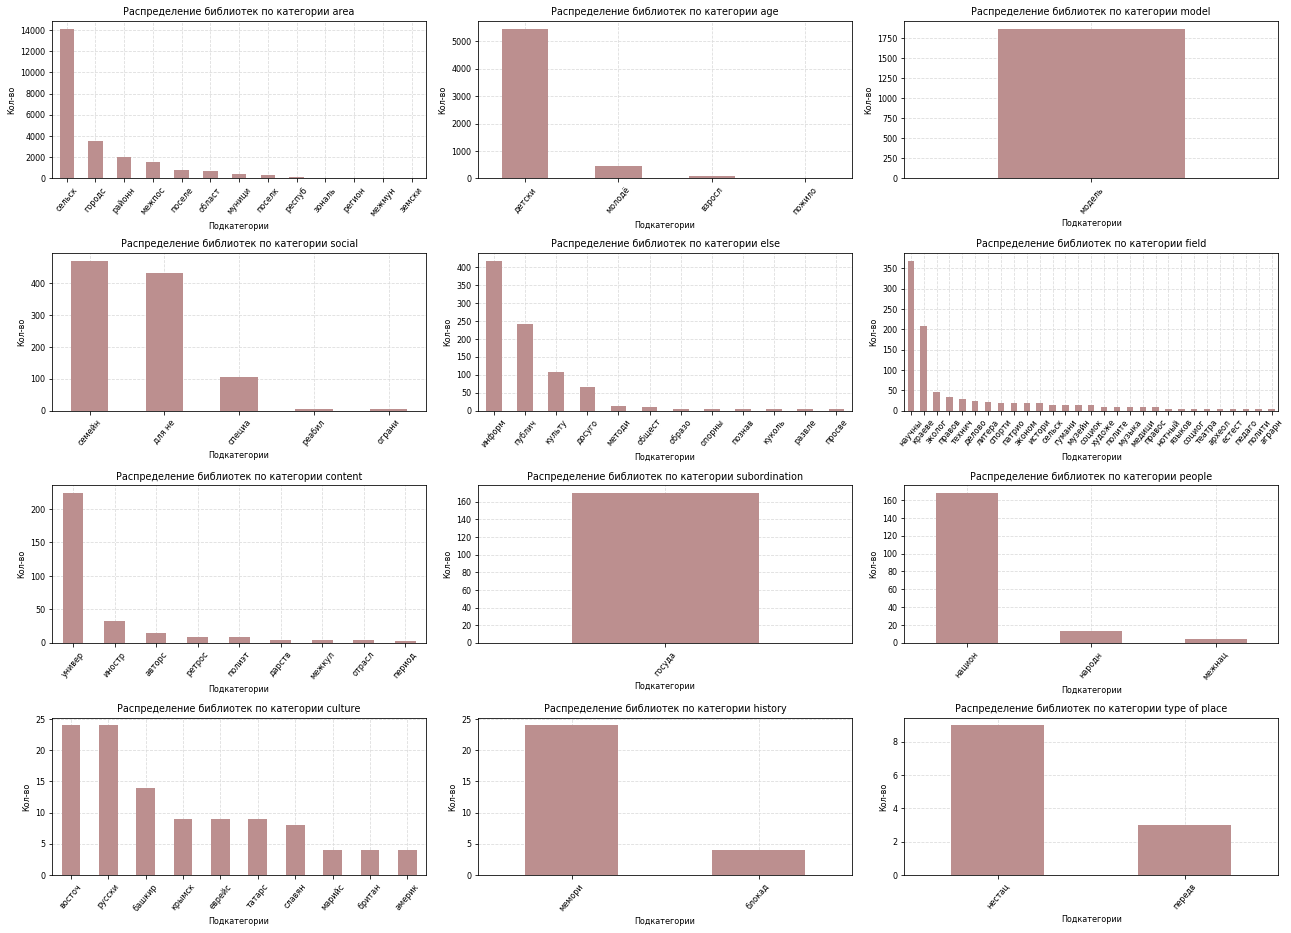

In [21]:
u = list(res.keys())
ncols, nrows = 3, 4
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(18, 13))
index = 0

for ax in axes:
    for i in range(ncols):
        typ = u[i+index]
        df = type_index[type_index.type == typ]
        df = df.sort_values('len', ascending=False)
        df['name'] = df.name.apply(lambda x: x[:6])
        plot = df.plot.bar(x='name', y='len', legend=None,
                    title = 'Распределение библиотек по категории {}'.format(typ),
                    ax=ax[i], rot=50, color = 'rosybrown')
        plot.set_xlabel("Подкатегории")
        plot.set_ylabel("Кол-во")
        plot.set_axisbelow(True)
        plot.yaxis.grid(color='gainsboro', linestyle='dashed')
        plot.xaxis.grid(color='gainsboro', linestyle='dashed')
    index += 3

plt.tight_layout()
plt.savefig(plot_path + "All_types.svg", format='svg', dpi=1200)
plt.show()

## Названия местностей

In [22]:
place_name = pd.read_csv('/Users/Stoneberry/Desktop/papers/master/data from names/places (2).csv', sep=";")

In [23]:
place_name.head()

,name,inds
0,абаканский,3974
1,абалакский,729
2,абатский,3532
3,абаульский,7830
4,абинский,1129


In [24]:
res = defaultdict(int)
subject = re.compile(' ?(?:республика|край|область|автономная область|автономный округ|город федерального значения|Республика|АО) ?')

for ind in place_name.inds:
    for i in ind.split(','):
        name = subject.sub('', data['Регион'][int(i)])
        res[name] += 1
        
res = sorted(res.items(), key=lambda kv: kv[1], reverse=True)

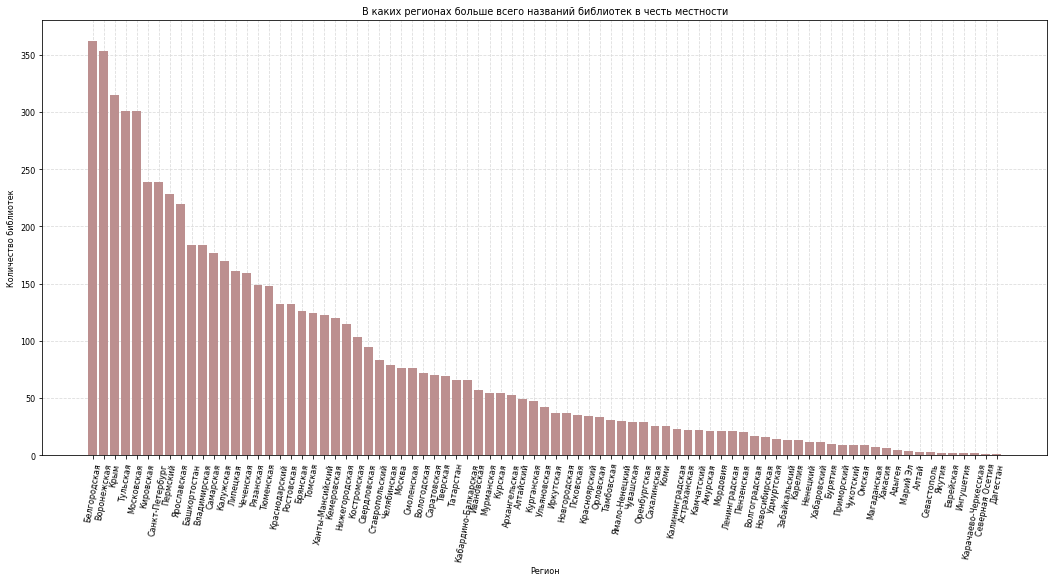

In [25]:
myplot([i[0] for i in res], [i[1] for i in res],
       'В каких регионах больше всего названий библиотек в честь местности', 
       'Регион', 'Количество библиотек', rotation = 80,
       name='place_region')